# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels 
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import statsmodels.api as sm                         # Statistical modeling
from sklearn.feature_selection import RFE            # Recursive Feature Elimination
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings('ignore')   # To suppress warnings
pd.set_option('display.max_columns', None)  # Optional: Show all columns in output

 

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df= pd.read_csv(r"C:\Users\surya\Downloads\assignment Lenear reg\porter_data_1.csv")
df.head(2)

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [16]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df.head(2)


market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [24]:
# Calculate time taken in minutes

df['total_time'] = df['actual_delivery_time'] - df['created_at']
df['total_time_minutes'] = df['total_time'].dt.total_seconds() / 60

df.head(2)


market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   

   total_outstanding_orders  distance      total_time  total_time_minutes  
0                      21.0     34.44 0 days 00:47:00                47.0  
1                       2.0     27.60 0 days 00:44:00                44.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [27]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract just the date (yyyy-mm-dd)
df['created_date'] = df['created_at'].dt.date

# Extract just the hour (0 to 23)
df['created_hour'] = df['created_at'].dt.hour
df.head()

df['created_date'] = pd.to_datetime(df['created_date'])
# Create a categorical feature 'isWeekend'
df['is_weekend'] = df['created_date'].dt.weekday.isin([5, 6]).astype(int)

# Convert is_weekend features to category type
df['is_weekend'] = df['is_weekend'].astype('category')

df.head(10)








market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   
5        1.0 2015-02-06 00:42:42  2015-02-06 01:38:42                     38   
6        1.0 2015-02-08 02:04:17  2015-02-08 03:07:17                     38   
7        1.0 2015-01-31 04:35:54  2015-01-31 05:33:54                     38   
8        1.0 2015-01-31 02:21:23  2015-01-31 02:58:23                     46   
9        1.0 2015-01-31 23:45:12  2015-02-01 00:26:12                     46   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   
5            1.0            3      4475                   3             925   
6            1.0            3      4375                   3            1325   
7            1.0            2      3150                   2            1425   
8            1.0            2       950                   2             150   
9            1.0            5      1285                   3             150   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   
5            1825                    4.0                 1.0   
6            1625                    6.0                 4.0   
7            1725                    4.0                 9.0   
8             700                   24.0                24.0   
9             400                   12.0                13.0   

   total_outstanding_orders  distance      total_time  total_time_minutes  \
0                      21.0     34.44 0 days 00:47:00                47.0   
1                       2.0     27.60 0 days 00:44:00                44.0   
2                      18.0     11.56 0 days 00:55:00                55.0   
3                       8.0     31.80 0 days 00:59:00                59.0   
4                       7.0      8.20 0 days 00:46:00                46.0   
5                       1.0     21.68 0 days 00:56:00                56.0   
6                       3.0     31.56 0 days 01:03:00                63.0   
7                      12.0     21.92 0 days 00:58:00                58.0   
8                      26.0      8.48 0 days 00:37:00                37.0   
9                      11.0     16.96 0 days 00:41:00                41.0   

  created_date  created_hour is_weekend  
0   2015-02-06            22          0  
1   2015-02-10            21          0  
2   2015-02-16             0          0  
3   2015-02-12             3          0  
4   2015-01-27             2          0  
5   2015-02-06             0          0  
6   2015-02-08             2          1  
7   2015-01-31             4          1  
8   2015-01-31             2          1  
9   2015-01-31            23          1

In [29]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.head(2)

market_id store_primary_category order_protocol  total_items  subtotal  \
0        1.0                      4            1.0            4      3441   
1        2.0                     46            2.0            1      1900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   

   total_busy_dashers  total_outstanding_orders  distance      total_time  \
0                14.0                      21.0     34.44 0 days 00:47:00   
1                 2.0                       2.0     27.60 0 days 00:44:00   

   total_time_minutes created_date  created_hour is_weekend  
0                47.0   2015-02-06            22          0  
1                44.0   2015-02-10            21          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [34]:
# Define target variable (y) and features (X)

X=df.drop({"total_time_minutes"},axis=1)
y=df["total_time_minutes"]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [37]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [39]:
print(X_train.shape)
print(X_test.shape)

(140621, 16)
(35156, 16)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [43]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columns (int, float)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (object, category, bool)
categorical_cols =  X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['store_primary_category', 'order_protocol', 'is_weekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

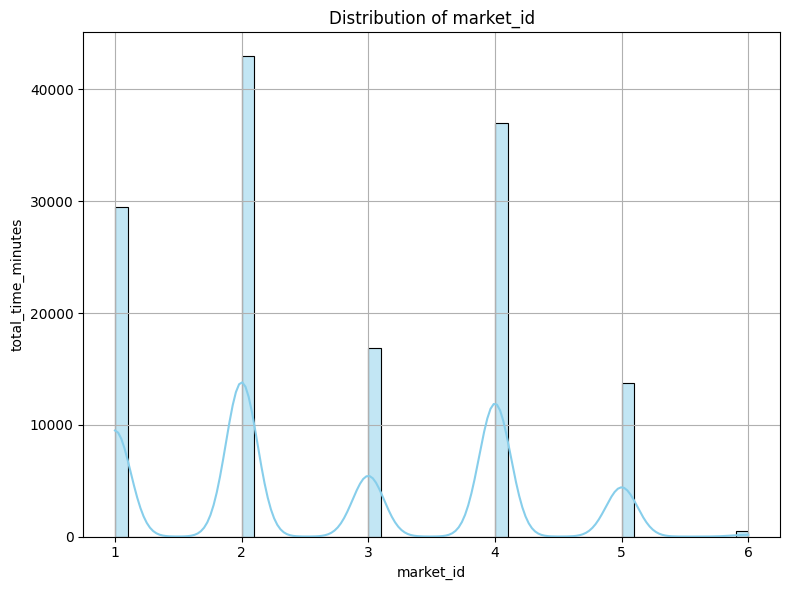

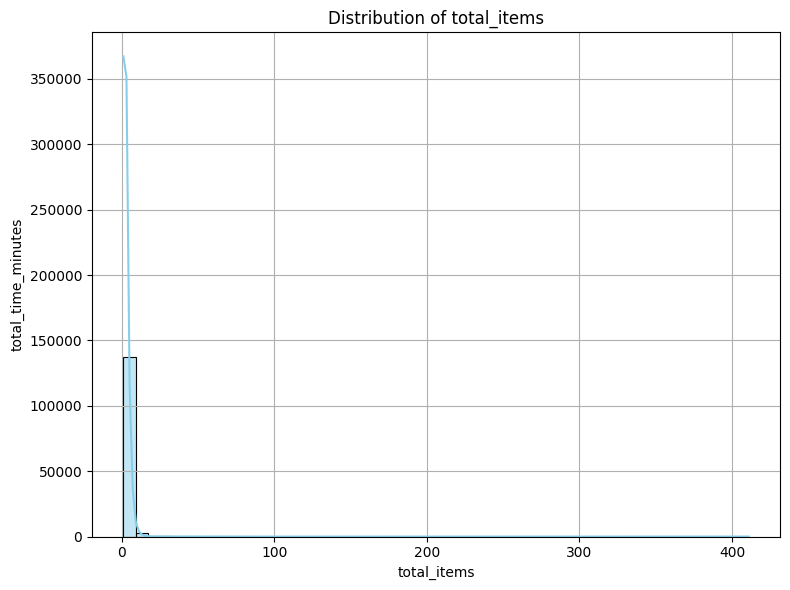

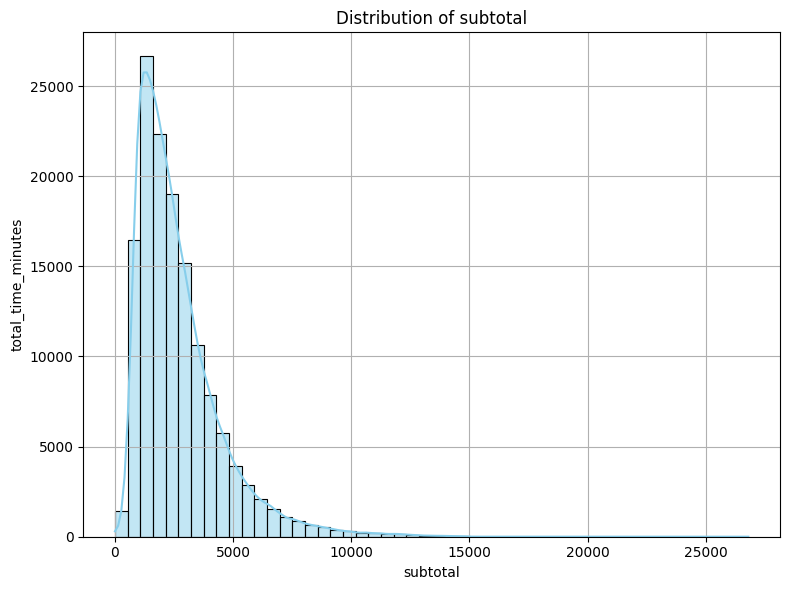

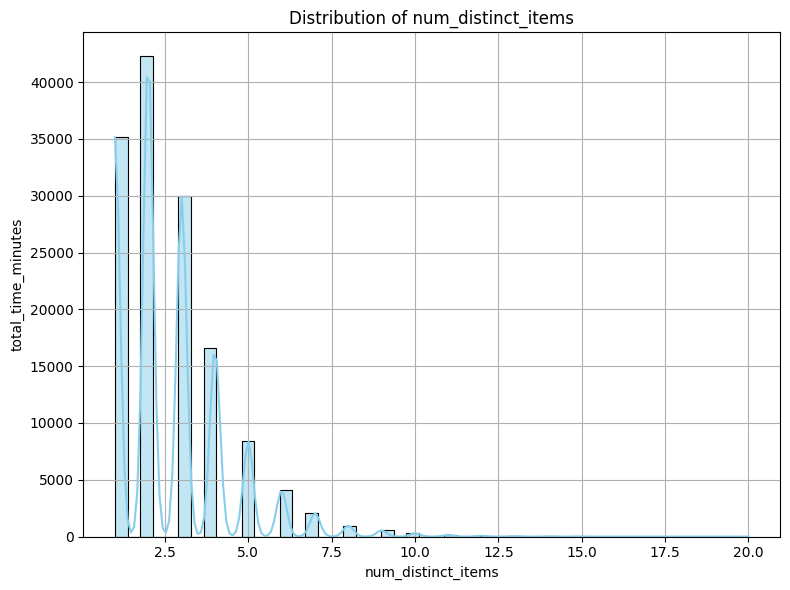

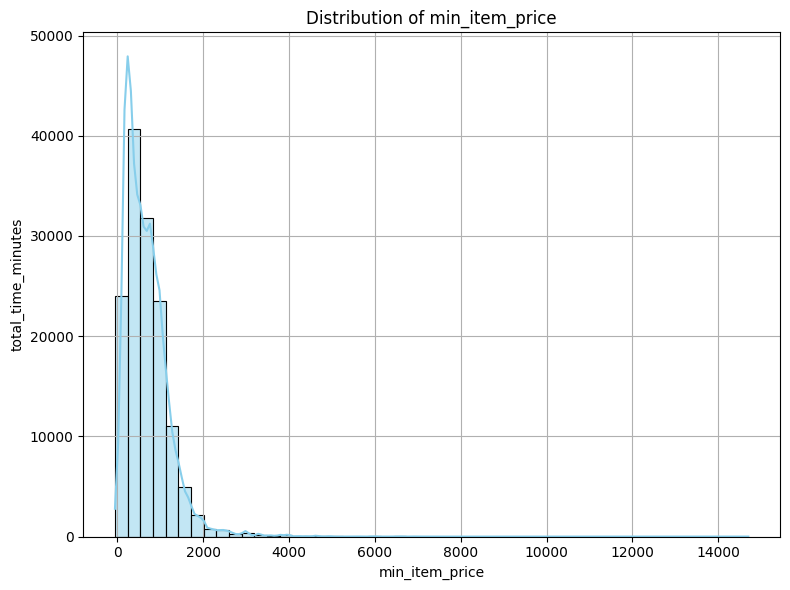

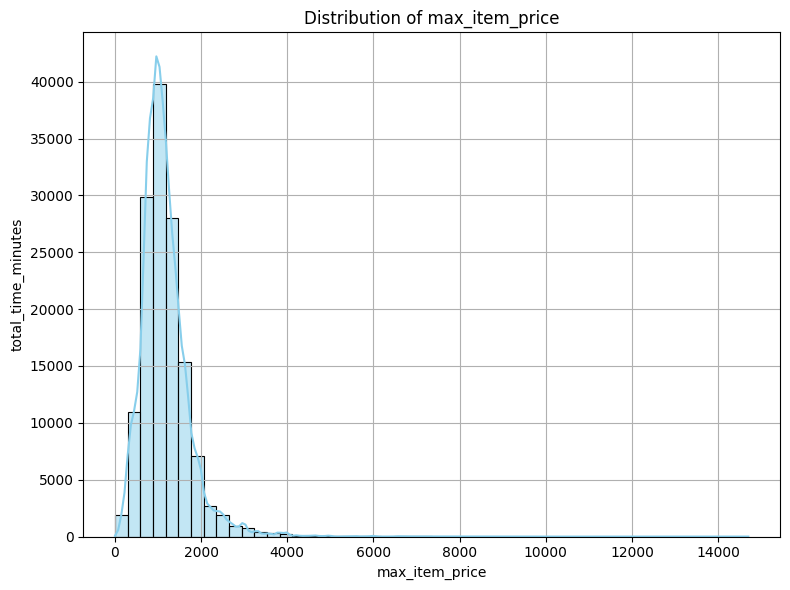

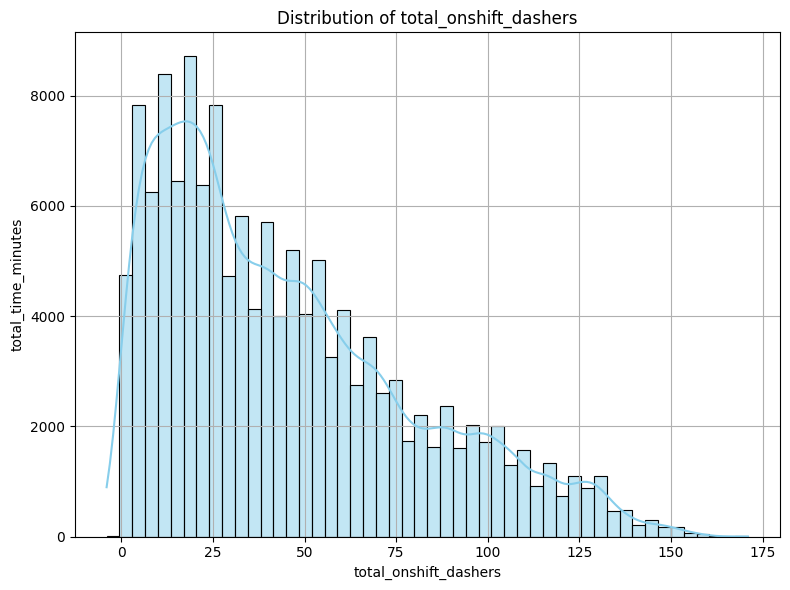

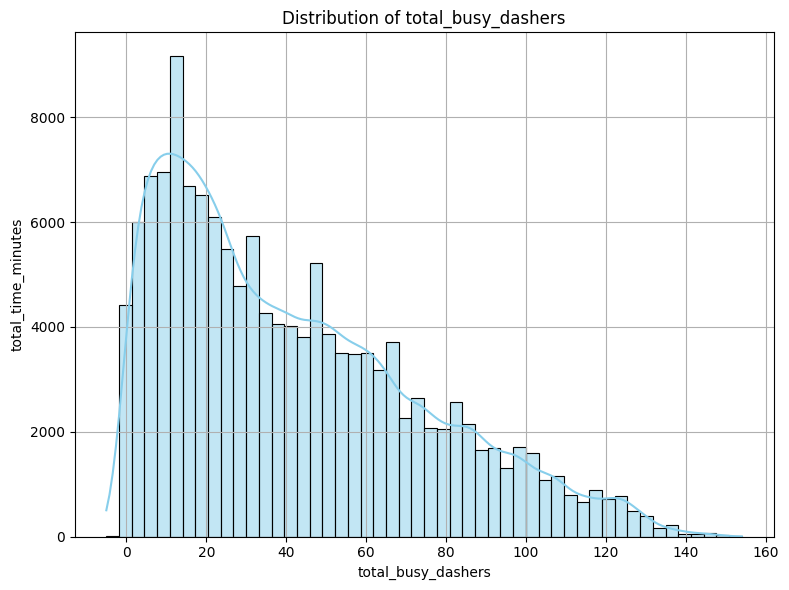

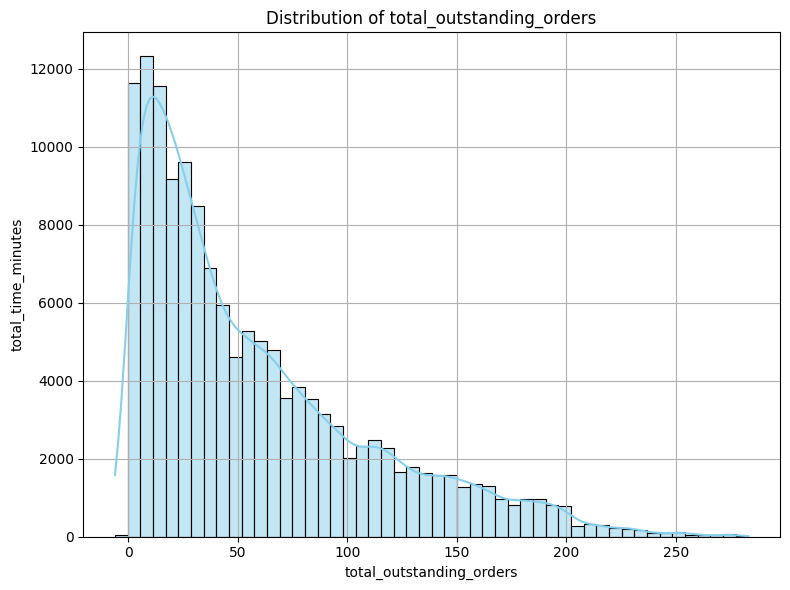

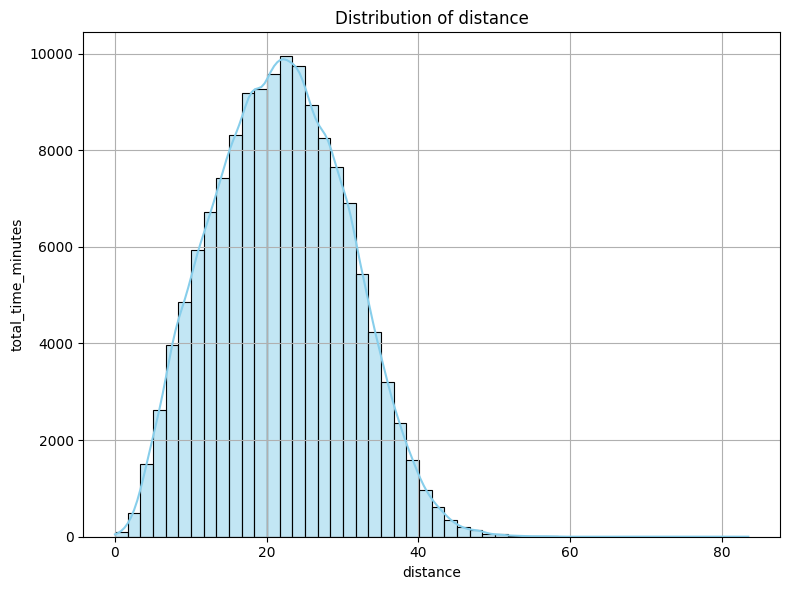

In [46]:

# Select numerical columns in the training set
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('total_time_minutes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


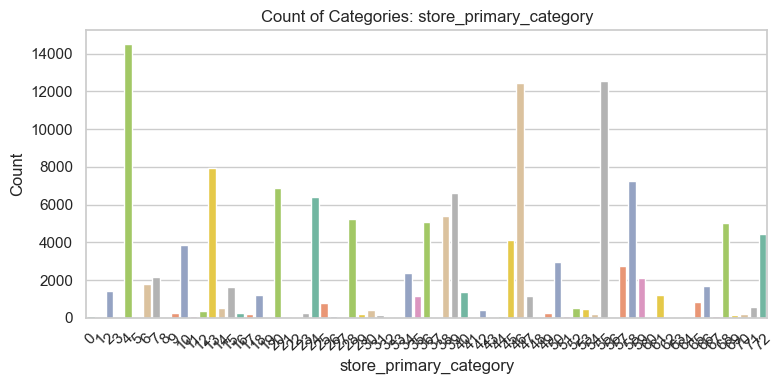

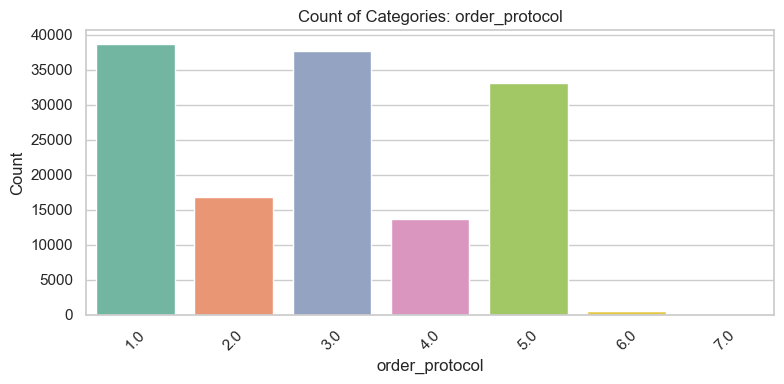

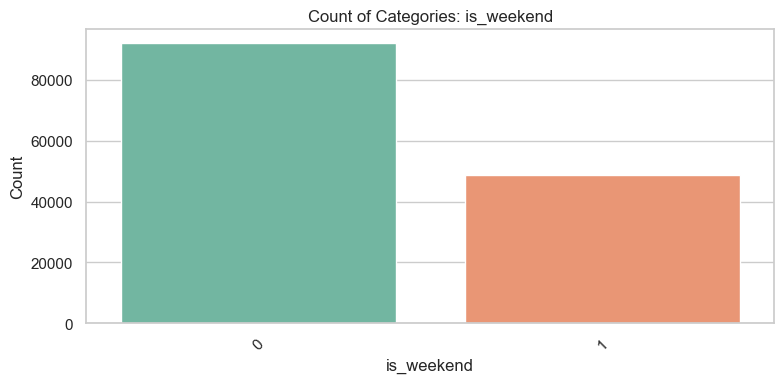

In [47]:
# Distribution of categorical columns

# Select only categorical columns
categorical_cols = X_train.select_dtypes(include='category').columns

# Set plot style
sns.set(style="whitegrid")

# Plot bar charts
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=X_train, palette='Set2')
    plt.title(f'Count of Categories: {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

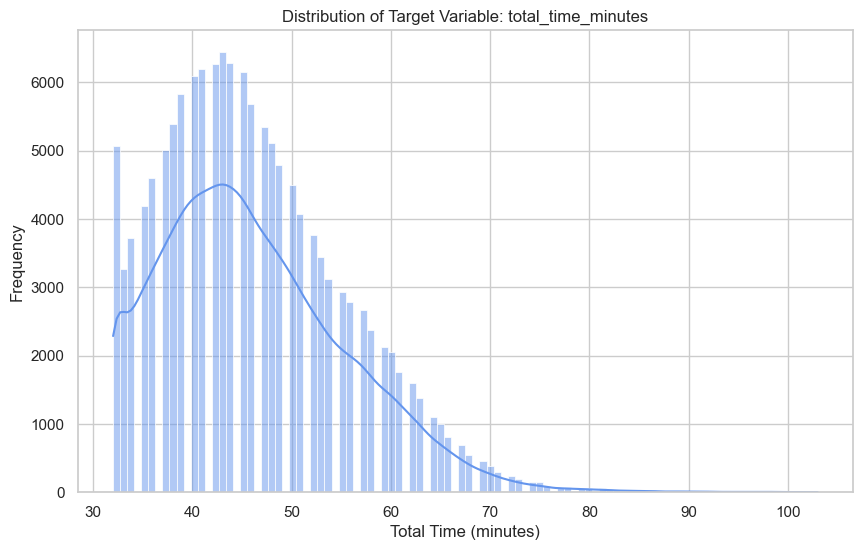

In [49]:
# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=100, kde=True, color='cornflowerblue')
plt.title('Distribution of Target Variable: total_time_minutes')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

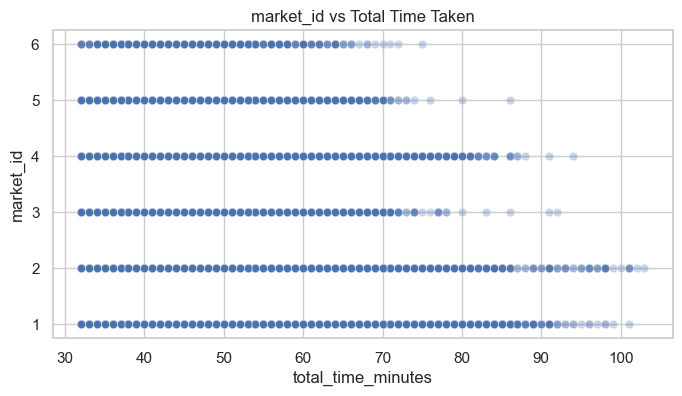

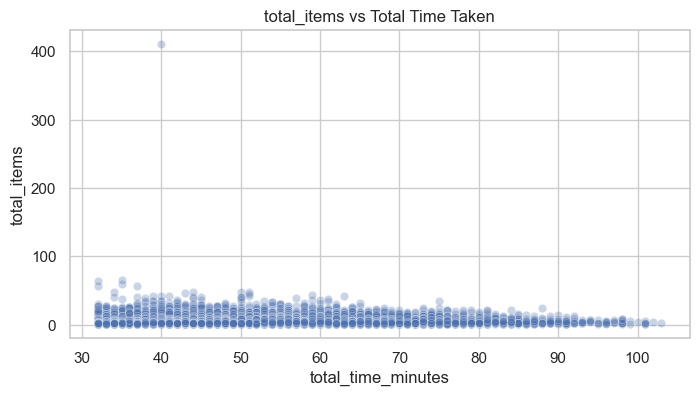

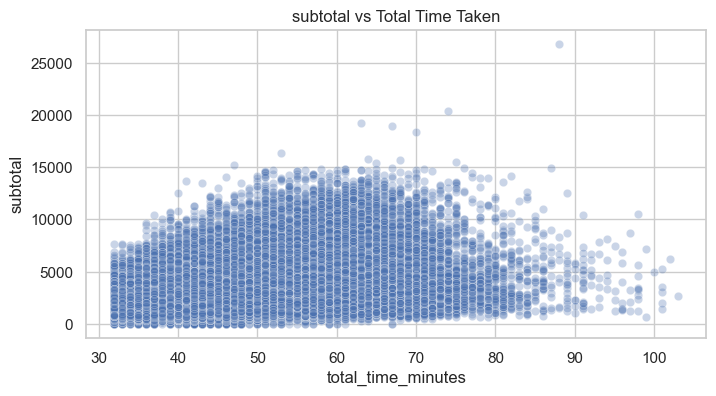

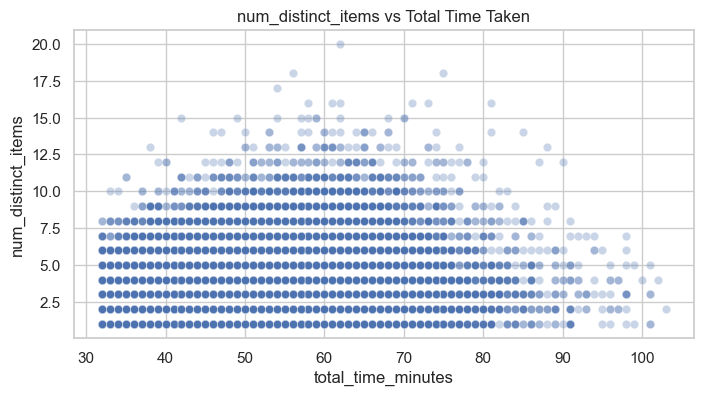

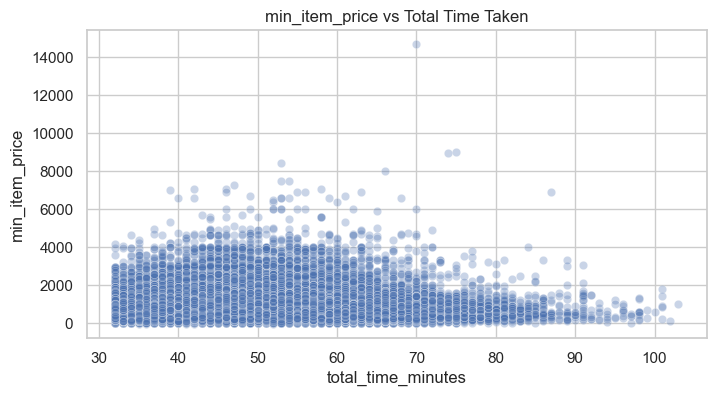

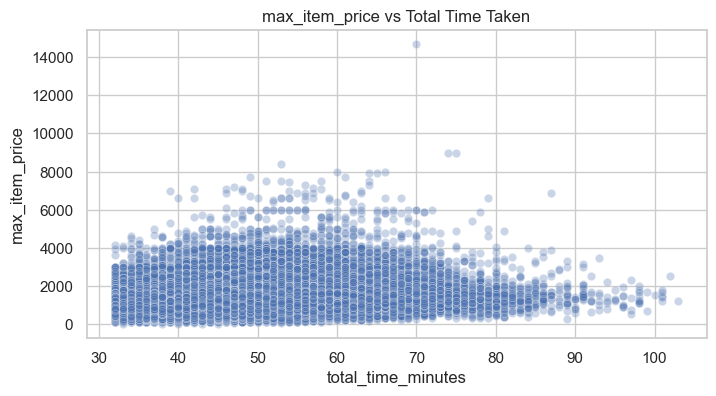

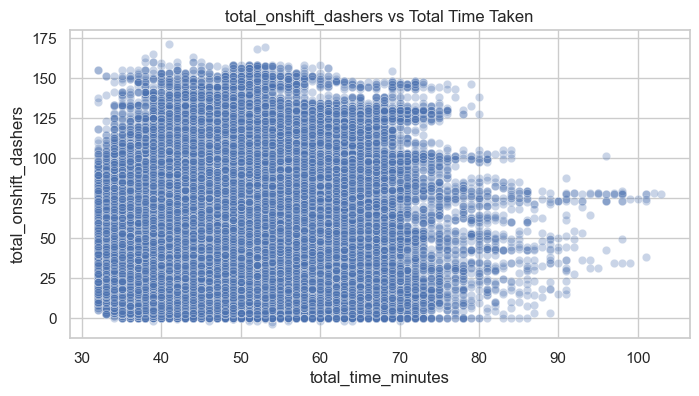

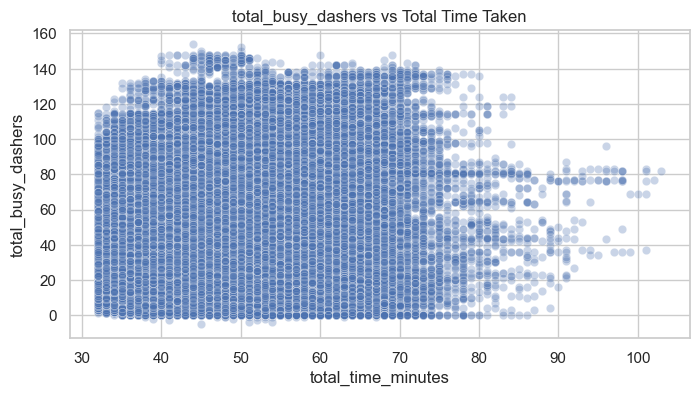

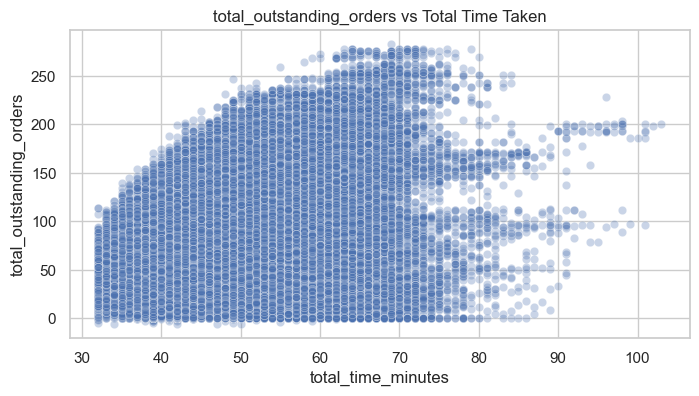

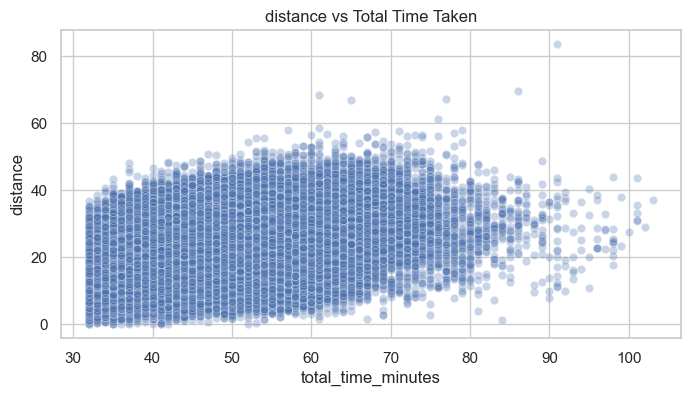

"numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()\nfor col in numerical_cols:\n    plt.figure(figsize=(8, 4))\n    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)\n    plt.title(f'Time Taken vs {col}')\n    plt.xlabel(col)\n    plt.ylabel('total_time_minutes')\n    plt.grid(True)\n    plt.show()"

In [52]:
# Scatter plot to visualise the relationship between total_time_minute and other features

# List of numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot each numerical feature on y-axis against total_time_minutes on x-axis
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_train, y=X_train[col], alpha=0.3)
    plt.title(f'{col} vs Total Time Taken')
    plt.xlabel('total_time_minutes')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()
'''numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('total_time_minutes')
    plt.grid(True)
    plt.show()'''

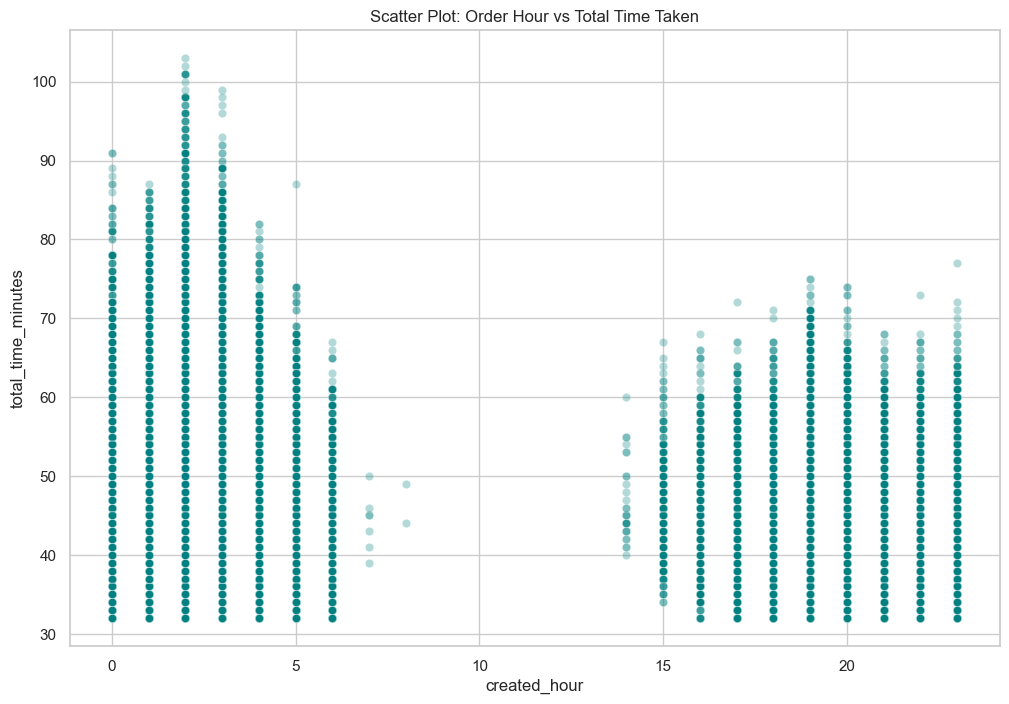

In [53]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train['created_hour'], y=y_train, alpha=0.3, color='teal')
plt.title('Scatter Plot: Order Hour vs Total Time Taken')
plt.xlabel('created_hour')
plt.ylabel('total_time_minutes')
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

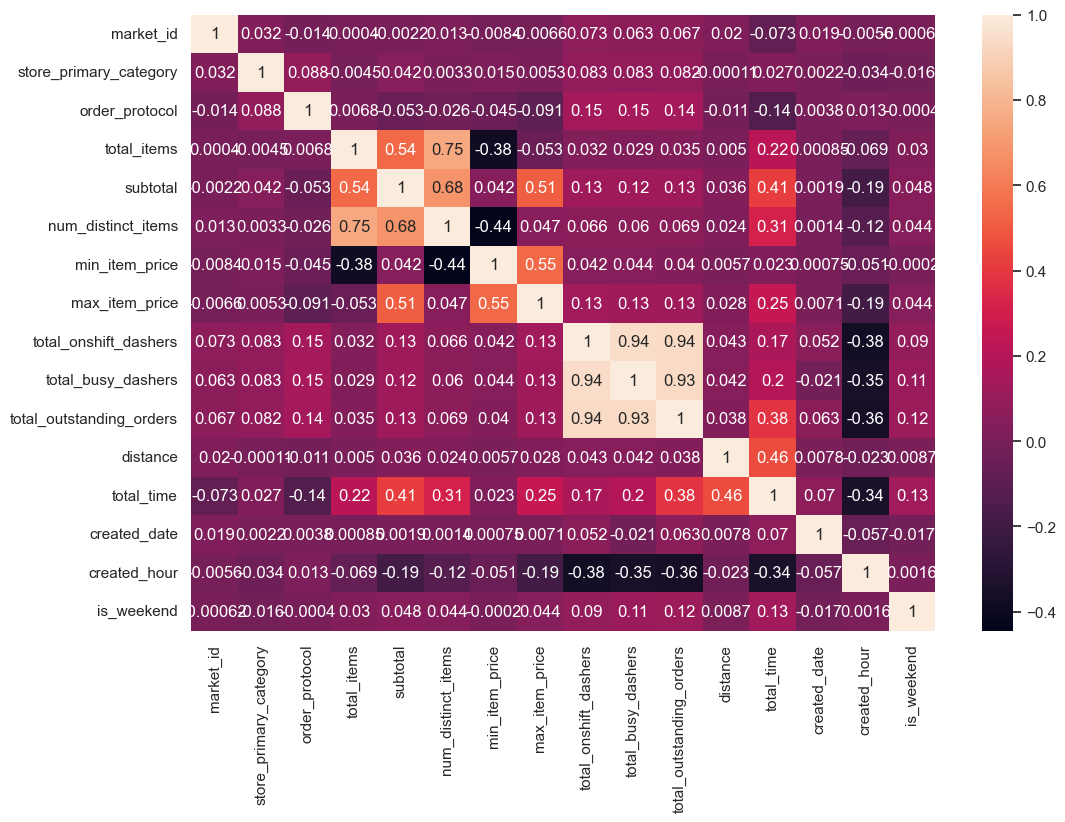

In [61]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [64]:
# Drop 3-5 weakly correlated columns from training dataset
X_train.drop(['min_item_price', 'market_id','store_primary_category','order_protocol',"created_date"], axis=1, inplace=True)
X_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
42111             1      1350                   1            1350   
58452             5      4285                   5             900   
20644             6      7880                   3            1450   
79735             3      3660                   3            1450   
167933            5      8575                   5            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance      total_time  created_hour is_weekend  
42111       9.60 0 days 00:32:00            20          0  
58452      34.56 0 days 01:11:00             2          1  
20644      34.92 0 days 01:02:00             3          0  
79735      25.76 0 days 00:54:00             2          1  
167933     17.72 0 days 00:56:00             2          0

In [67]:
X_train.drop(["total_time"], axis=1, inplace=True)
X_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
42111             1      1350                   1            1350   
58452             5      4285                   5             900   
20644             6      7880                   3            1450   
79735             3      3660                   3            1450   
167933            5      8575                   5            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  created_hour is_weekend  
42111       9.60            20          0  
58452      34.56             2          1  
20644      34.92             3          0  
79735      25.76             2          1  
167933     17.72             2          0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

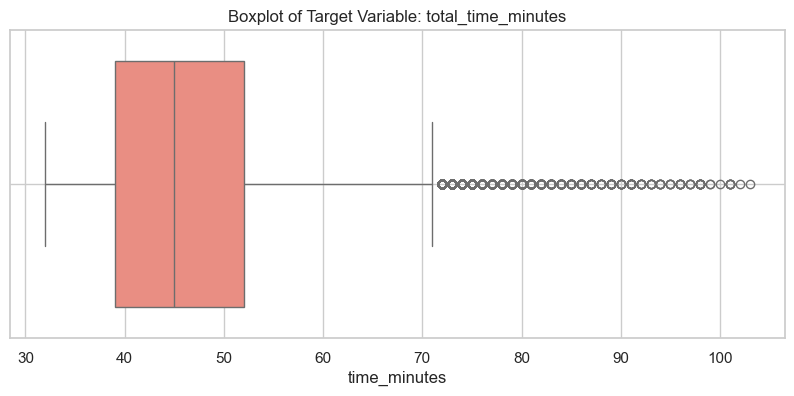

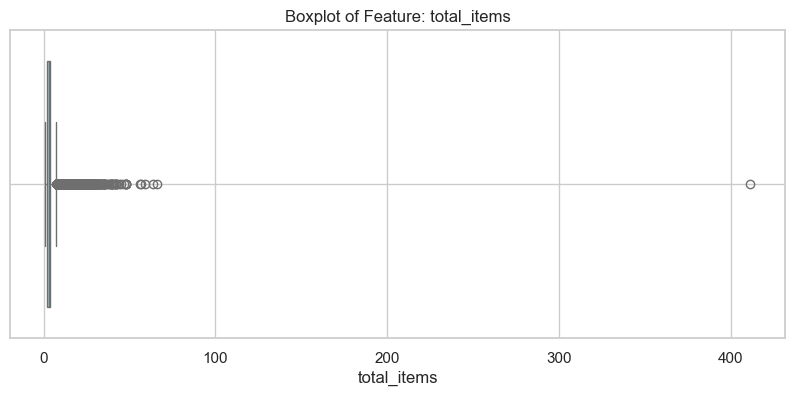

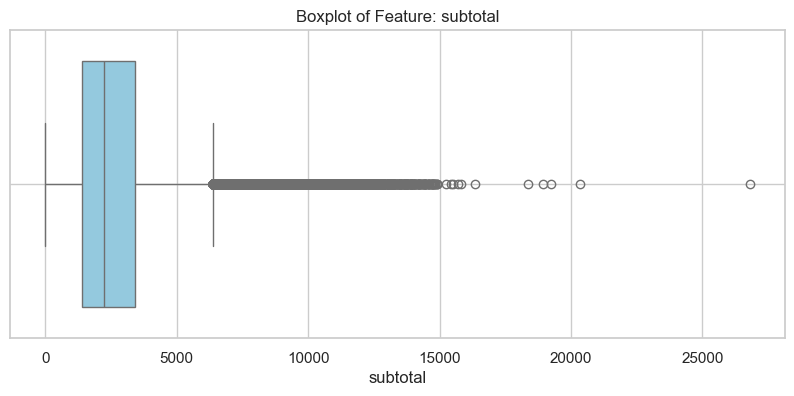

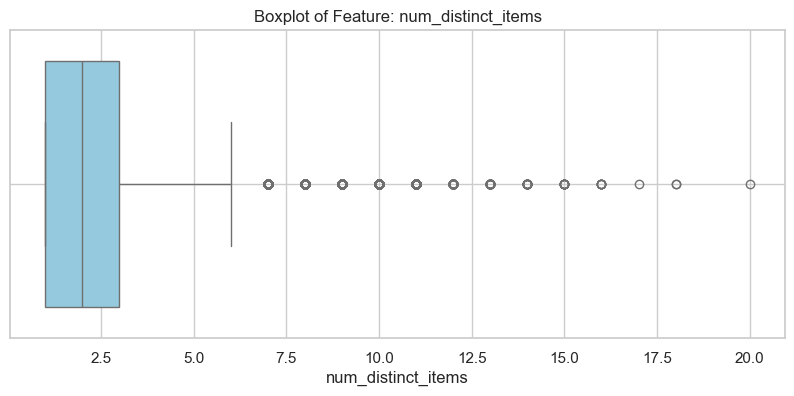

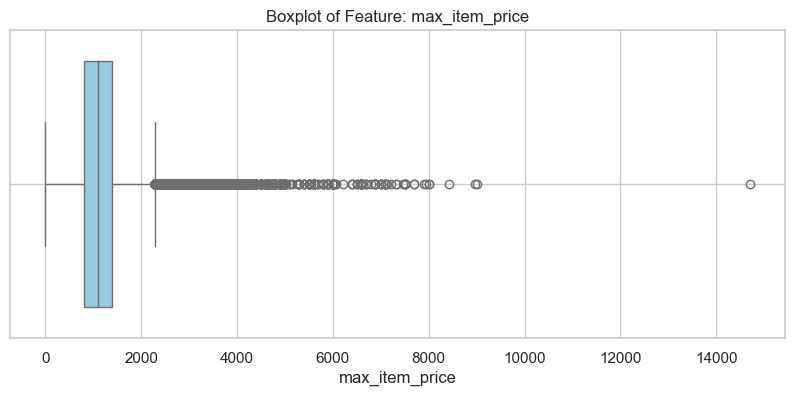

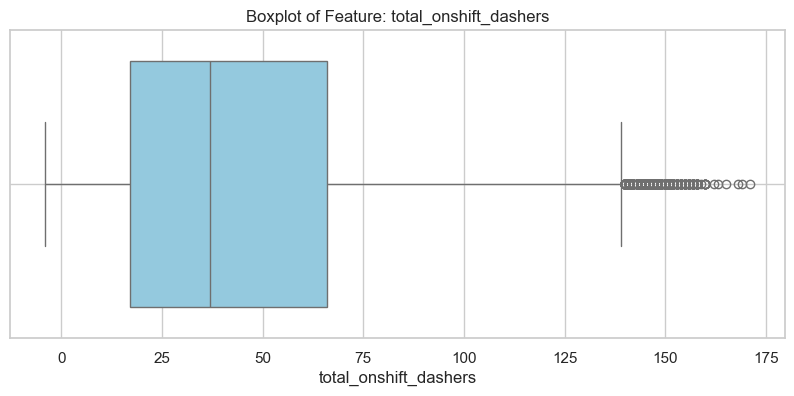

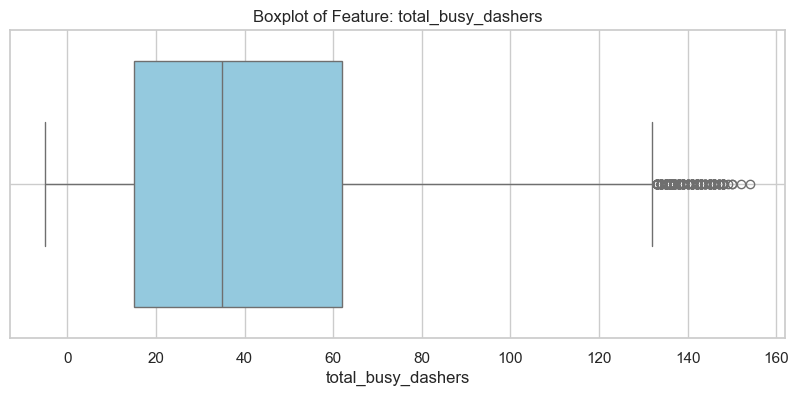

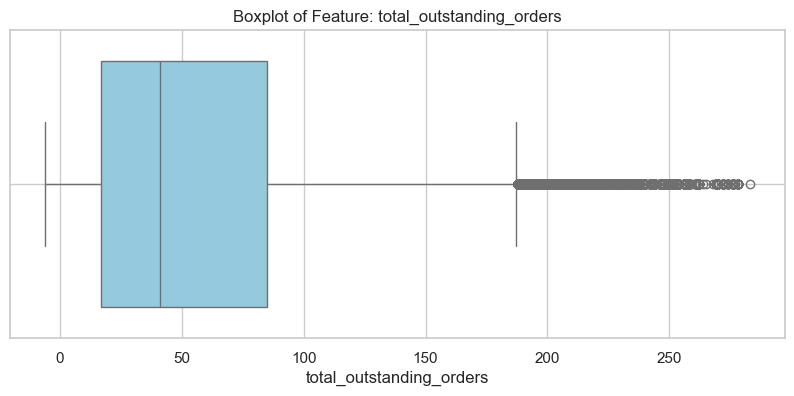

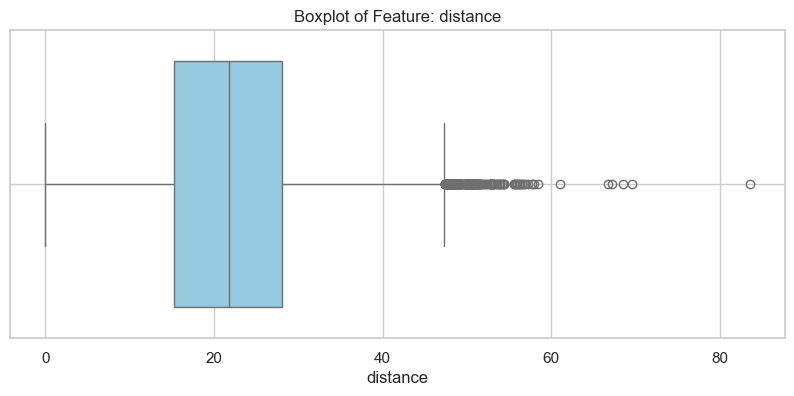

In [71]:
# Boxplot for time_taken

plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train, color='salmon')
plt.title('Boxplot of Target Variable: total_time_minutes')
plt.xlabel('time_minutes')
plt.grid(True)
plt.show()

# Boxplots for each numerical feature in X_train
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=X_train[col], color='skyblue')
    plt.title(f'Boxplot of Feature: {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [72]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

numerical_cols

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [74]:
def get_outlier_mask_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[column] >= lower) & (df[column] <= upper)

# Start with a mask of all True
mask = pd.Series(True, index=X_train.index)

# Combine masks across all numerical columns
for col in numerical_cols:
    mask &= get_outlier_mask_iqr(X_train, col)

# Apply mask to both features and target
X_train = X_train[mask]
y_train = y_train[mask]


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [76]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Numerical columns (int, float)
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (object, category, bool)
categorical_cols =  X_test.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['store_primary_category', 'order_protocol', 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

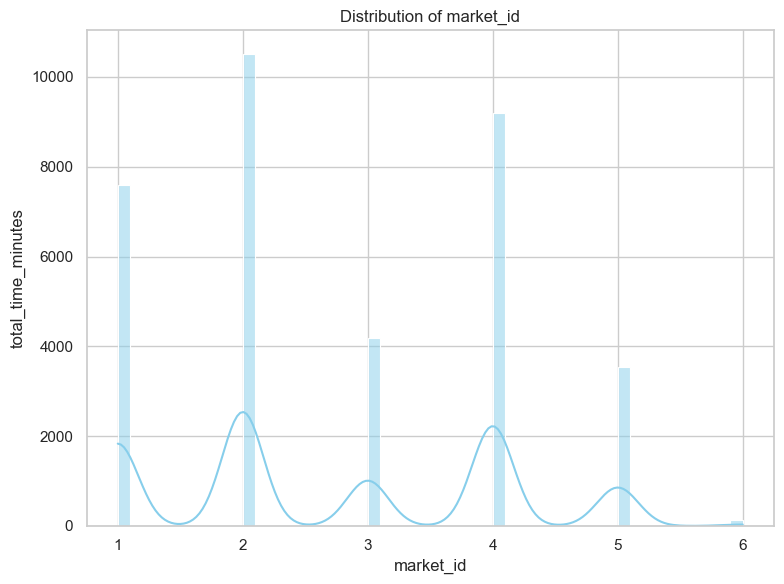

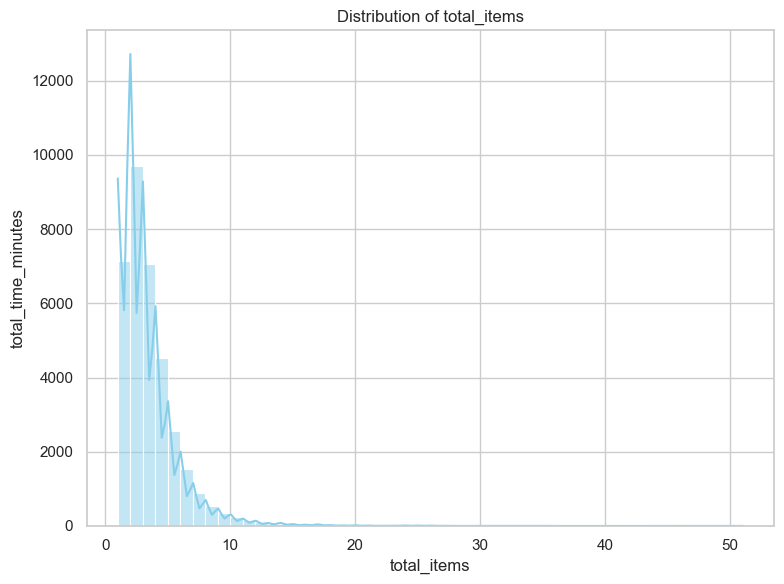

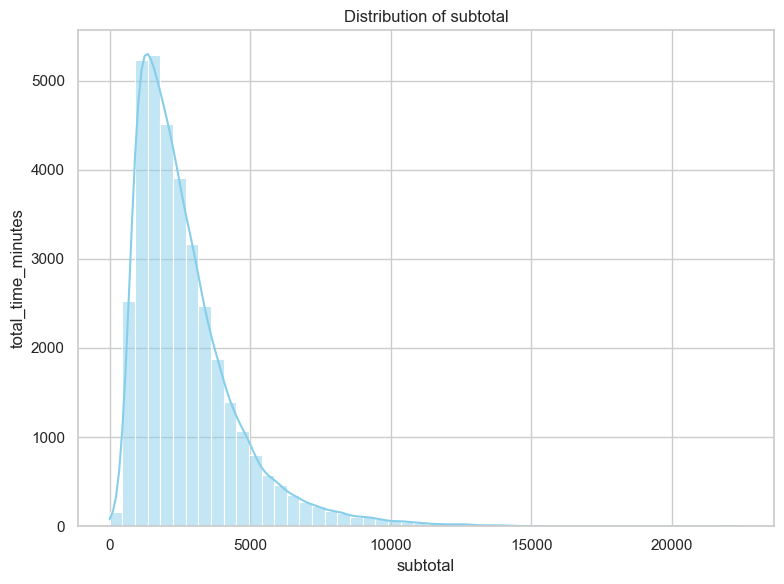

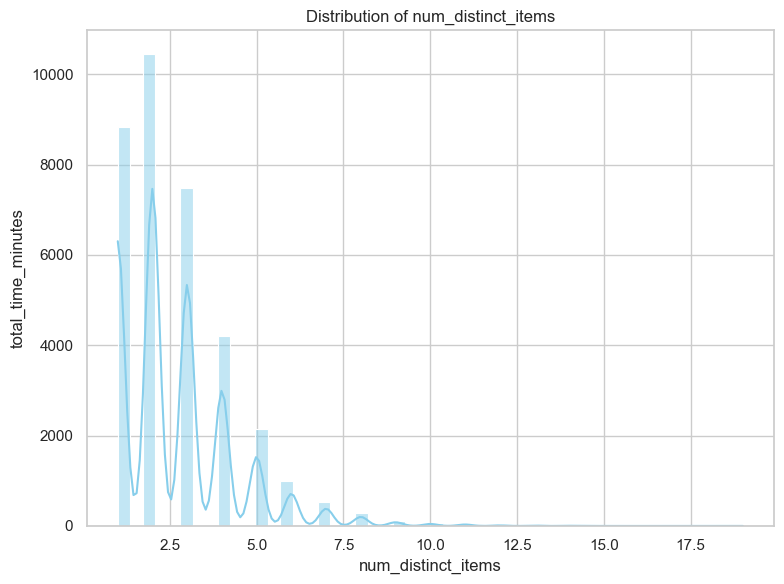

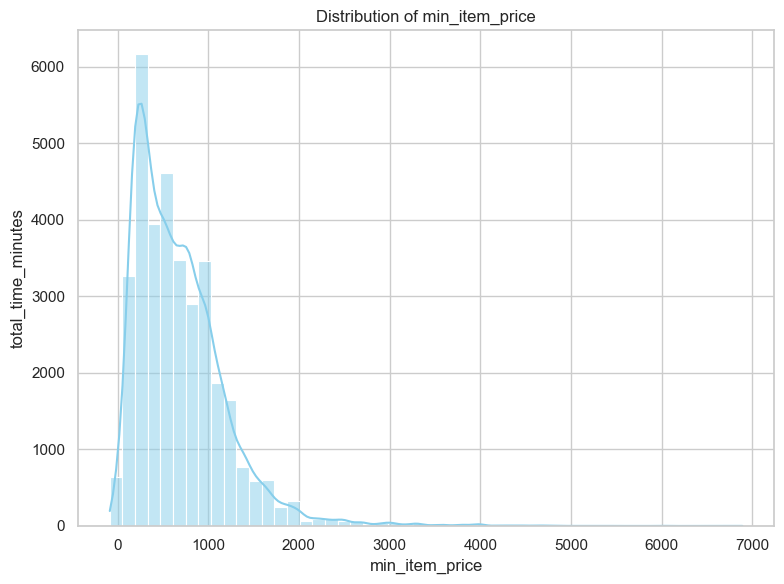

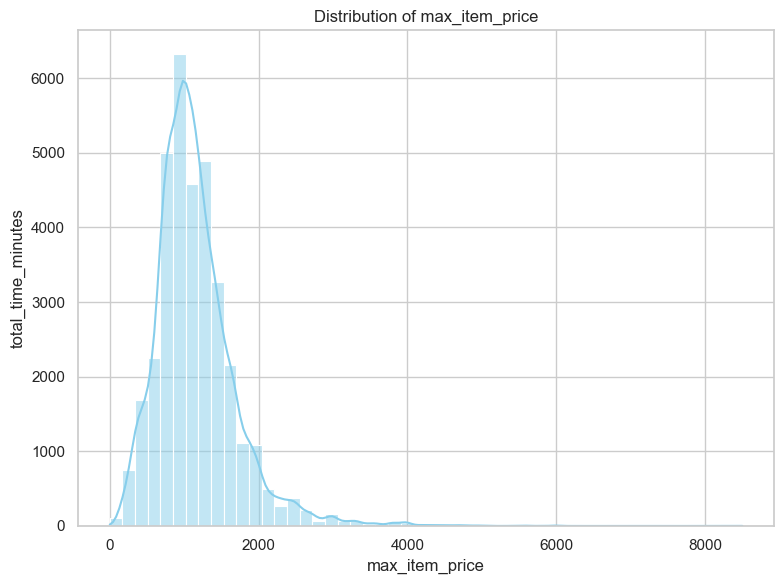

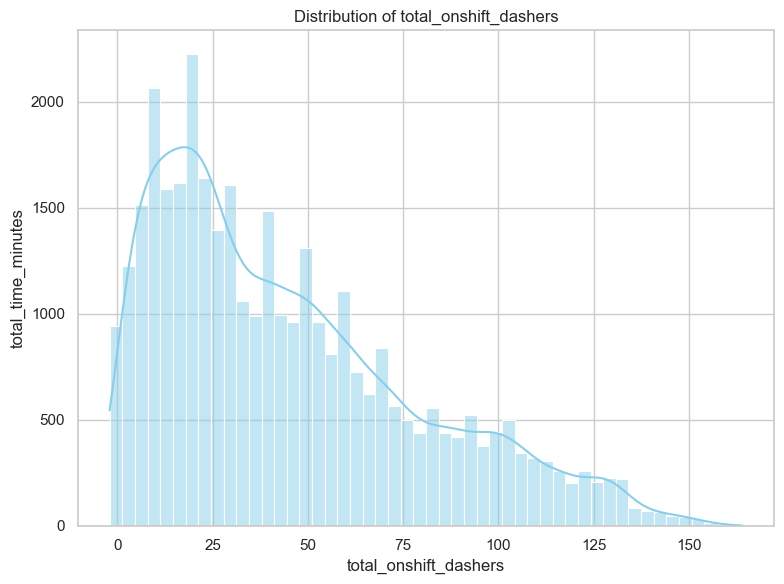

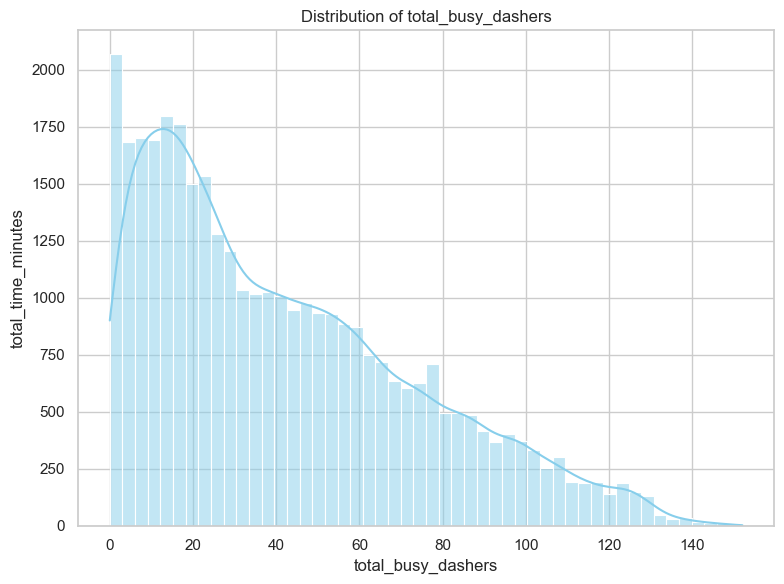

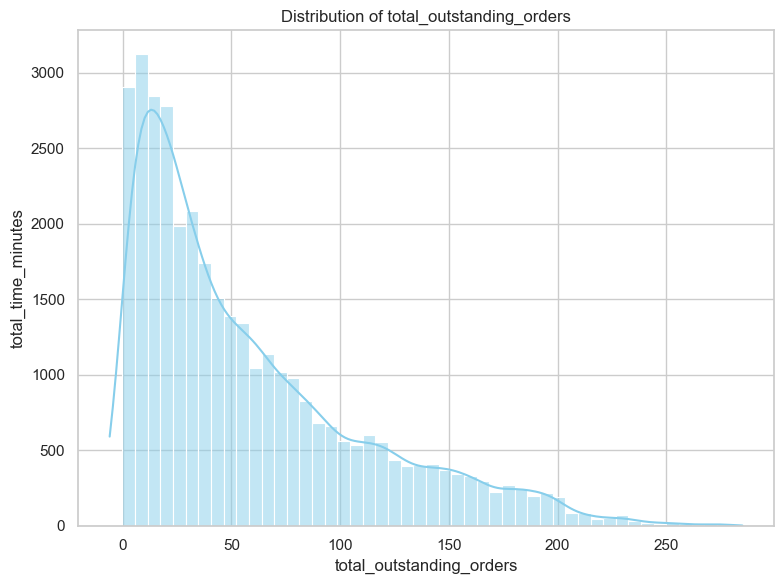

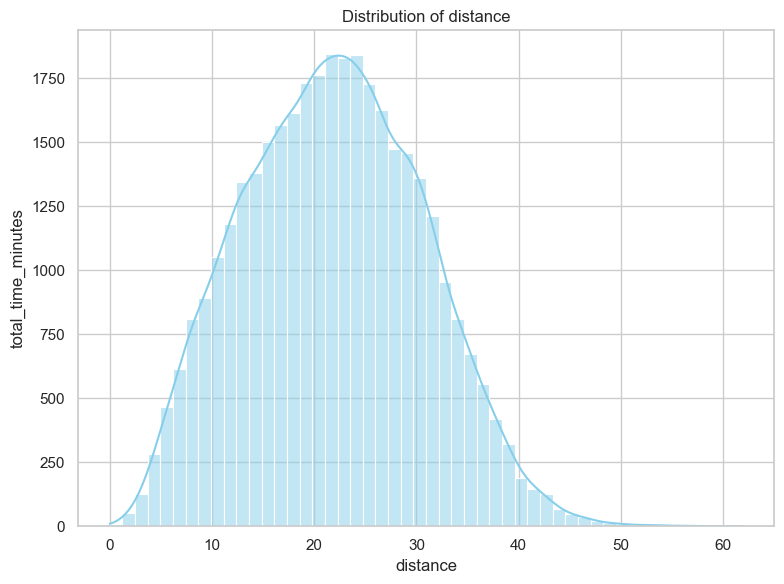

In [83]:
# Plot distributions for all numerical columns


# Select numerical columns in the training set
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_test[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('total_time_minutes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

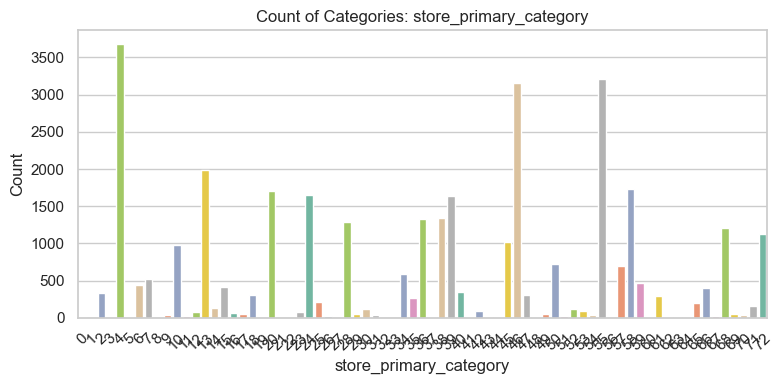

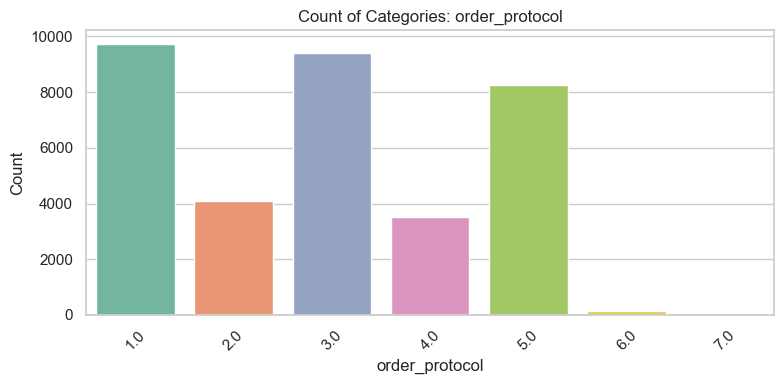

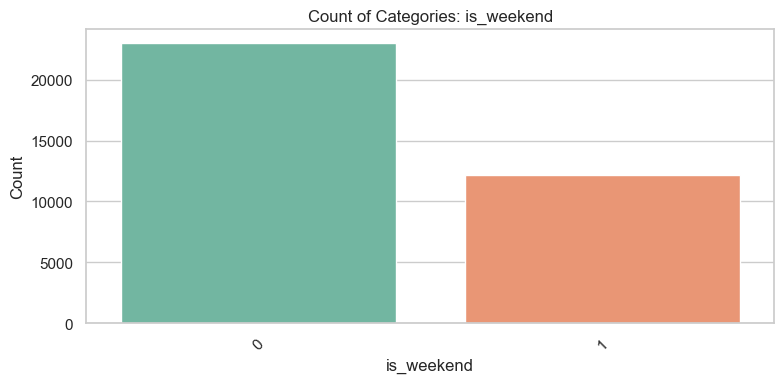

In [85]:
# Distribution of categorical columns



# Select only categorical columns
categorical_cols = X_test.select_dtypes(include='category').columns

# Set plot style
sns.set(style="whitegrid")

# Plot bar charts
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=X_test, palette='Set2')
    plt.title(f'Count of Categories: {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

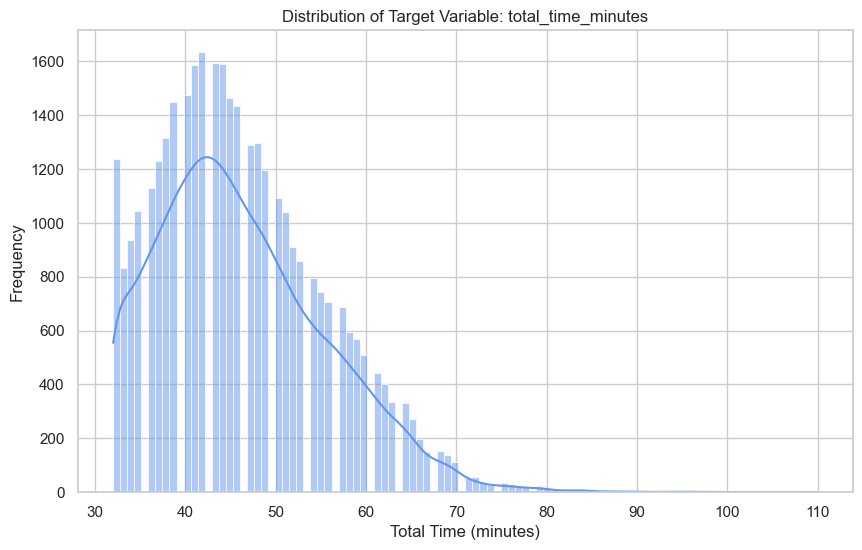

In [87]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=100, kde=True, color='cornflowerblue')
plt.title('Distribution of Target Variable: total_time_minutes')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

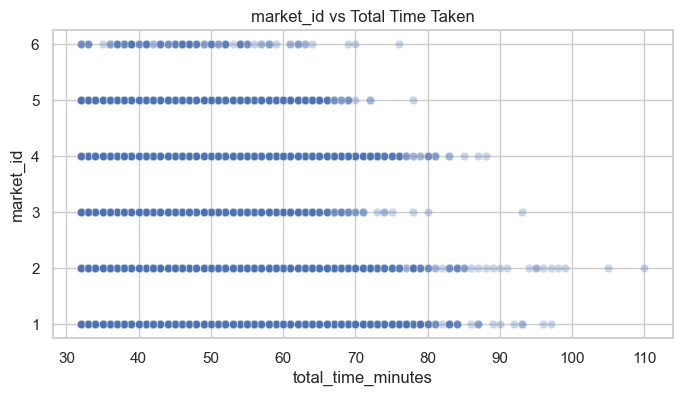

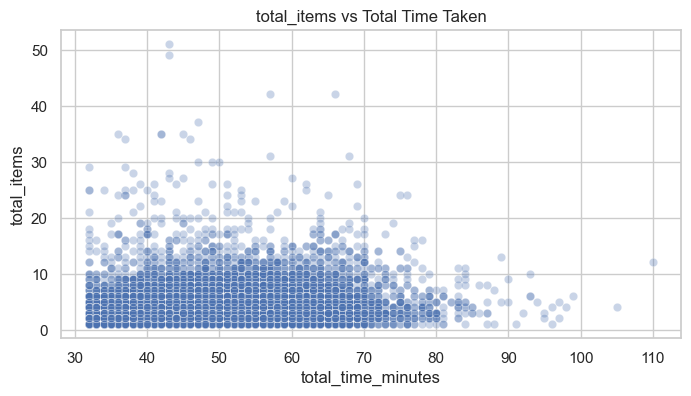

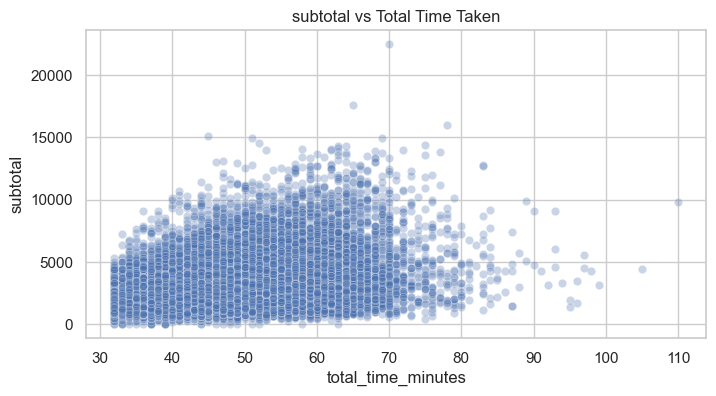

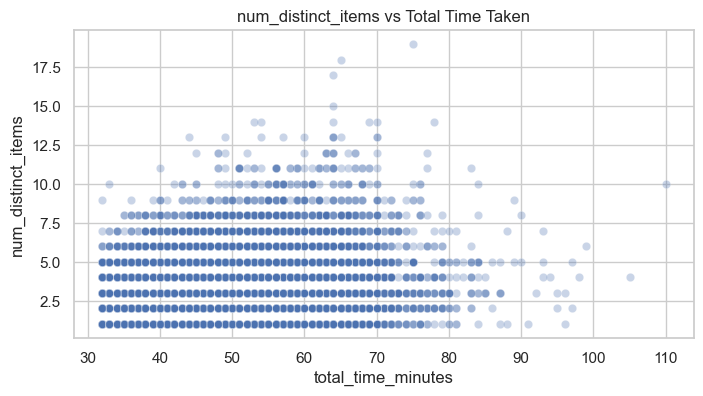

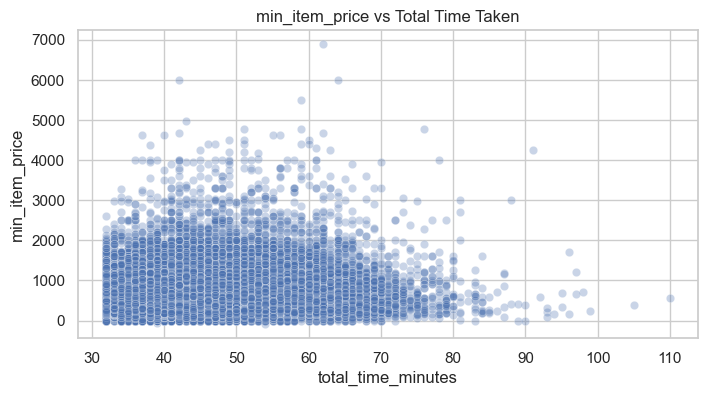

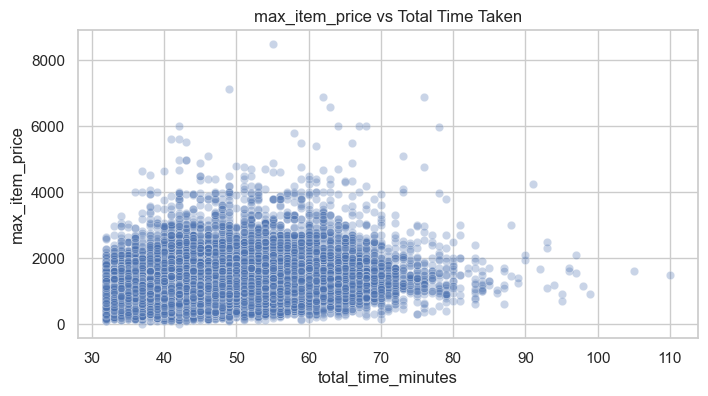

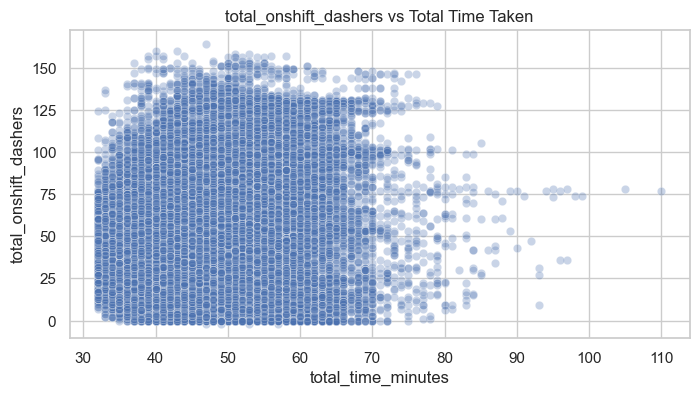

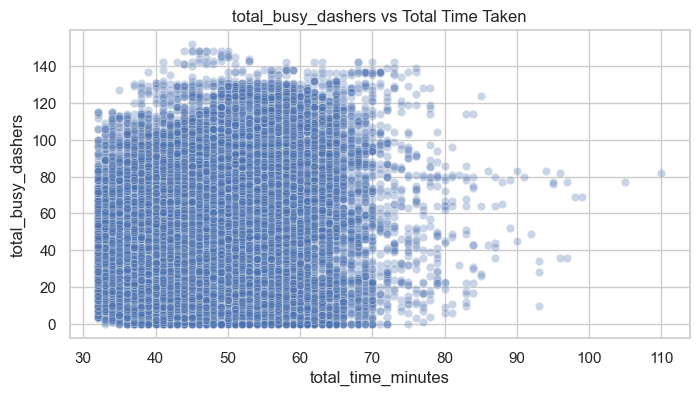

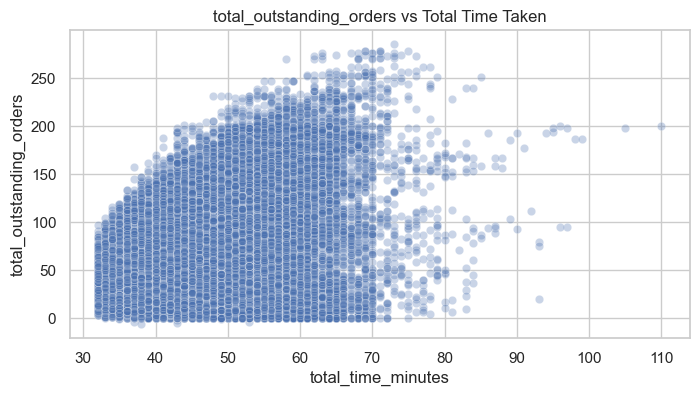

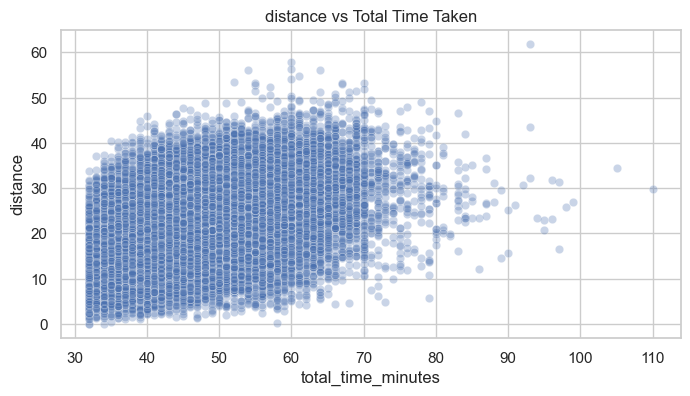

In [90]:
# Scatter plot to visualise the relationship between time_taken and other features
# List of numerical features
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot each numerical feature on y-axis against total_time_minutes on x-axis
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x = y_test, y = X_test[col], alpha=0.3)
    plt.title(f'{col} vs Total Time Taken')
    plt.xlabel('total_time_minutes')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


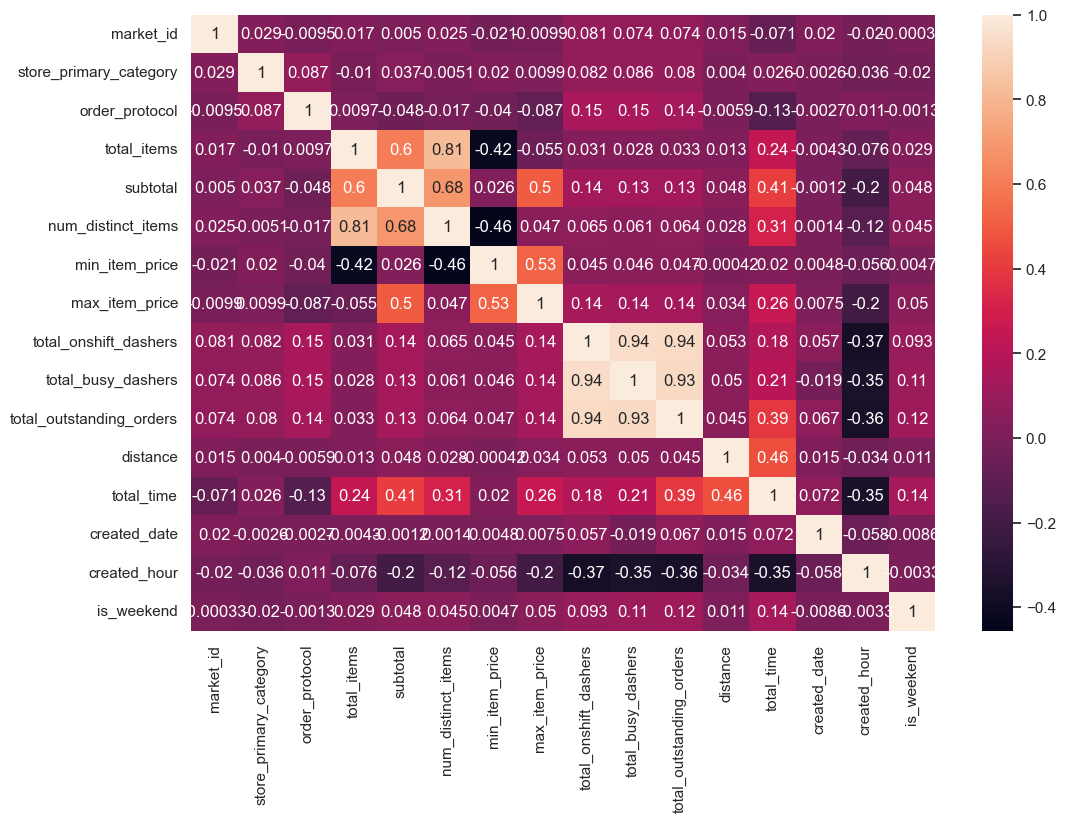

In [91]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(X_test.corr(),annot=True)
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [94]:
# Drop the weakly correlated columns from test dataset

X_test.drop(['min_item_price', 'market_id','store_primary_category','order_protocol','total_time','created_date'], axis=1, inplace=True)
X_test.head()

total_items  subtotal  num_distinct_items  max_item_price  \
139667            3      1295                   2             995   
80077             2      2950                   1            1225   
41872             1      1395                   1            1395   
165269            2      2967                   2            1249   
151215            3      1250                   2             400   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
139667                   59.0                59.0                      61.0   
80077                    18.0                17.0                      16.0   
41872                    28.0                27.0                      45.0   
165269                  124.0               127.0                     200.0   
151215                   39.0                30.0                      33.0   

        distance  created_hour is_weekend  
139667     20.56             3          0  
80077      12.84             1          1  
41872      16.80             3          0  
165269     19.00             3          1  
151215     26.72            22          1

In [96]:
X_test.drop(['total_time','created_date'], axis=1, inplace=True)
X_test.head()

KeyError: "['total_time', 'created_date'] not found in axis"

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [107]:
# Select only numeric columns for scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Instantiate
scaler = StandardScaler()

# 2. Fit on X_train (DataFrame) and transform
X_train_scaled_arr = scaler.fit_transform(X_train)

# 3. Transform X_test
X_test_scaled_arr  = scaler.transform(X_test)

# 4. Convert back to DataFrames (preserving index & columns)
X_train_scaled = pd.DataFrame(
    X_train_scaled_arr,
    index=X_train.index,
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    X_test_scaled_arr,
    index=X_test.index,
    columns=X_test.columns
)

# Quick peek
print(X_train_scaled.head())

        total_items  subtotal  num_distinct_items  max_item_price  \
42111     -1.181616 -0.773860           -1.144030        0.687512   
79735      0.176975  1.084898            0.474924        0.939299   
80691      0.856271 -1.420804            1.284401       -2.084666   
170910    -1.181616 -0.589594           -1.144030        1.264104   
64999     -0.502320 -0.130134           -1.144030       -0.634371   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111               -0.594942           -0.643488                 -0.736456   
79735                2.716645            2.284403                  2.643536   
80691               -1.295470           -1.290348                 -1.153468   
170910              -1.136259           -0.881805                 -0.692560   
64999               -0.531257           -0.473262                 -0.538924   

        distance  created_hour  is_weekend  
42111  -1.397377      1.258954   -0.698379  
79735   0.464129    

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [113]:
# Create/Initialise the model
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train_scaled)
X_test_sm=sm.add_constant(X_test_scaled)

In [115]:
import statsmodels.api as sm
import pandas as pd

# 1. Ensure X_train is numeric
X_train_numeric = X_train_scaled.apply(pd.to_numeric, errors='coerce')

# 2. Drop rows with NaNs in X or y
data = pd.concat([X_train_numeric, y_train], axis=1).dropna()

# 3. Separate features and target again
X_clean = data.drop(columns=y_train.name)
y_clean = data[y_train.name]

# 4. Add constant for intercept
X_train_sm = sm.add_constant(X_clean)

# 5. Fit the OLS model
model = sm.OLS(y_clean, X_train_sm).fit()

# 6. Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     total_time_minutes   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 6.754e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:43:31   Log-Likelihood:            -3.1844e+05
No. Observations:              121158   AIC:                         6.369e+05
Df Residuals:                  121147   BIC:                         6.370e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Ensure all variables are numeric
X_vif = X_train_sm.copy()
#X_vif = X_vif.apply(pd.to_numeric, errors='coerce')  # convert all columns to numeric
  # fill any NaNs with 0

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display
print(vif_data)


                     Feature        VIF
0                      const   1.000000
1                total_items   6.211723
2                   subtotal   3.928133
3         num_distinct_items   4.838837
4             max_item_price   2.332122
5      total_onshift_dashers  11.113376
6         total_busy_dashers  10.226124
7   total_outstanding_orders   9.384505
8                   distance   1.003094
9               created_hour   1.202809
10                is_weekend   1.011709


Text(0.5, 0, 'Errors')

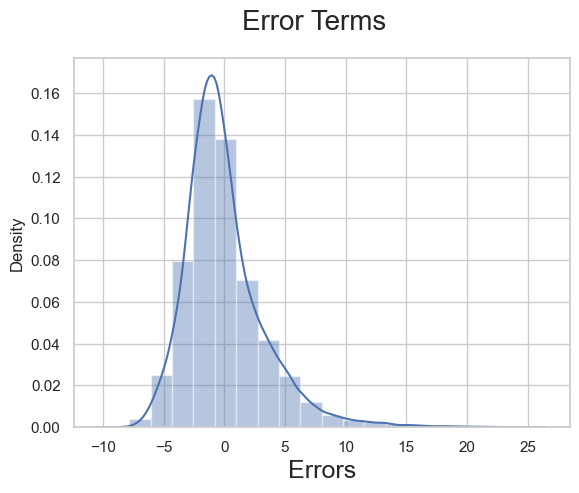

In [161]:
# make predictions
y_train_price = model.predict(X_train_sm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


In [121]:
# Find results for evaluation metrics

y_test_price = model.predict(X_test_sm)

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [125]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=8)
selector=selector.fit(X_train_sm,y_train)
selector.support_


array([False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [141]:
selected_features=X_train_sm.columns[selector.support_]
print(selected_features)

Index(['subtotal', 'num_distinct_items', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'created_hour', 'is_weekend'],
      dtype='object')


In [143]:
# Build the final model with selected number of features
X_train_lm=X_train_sm[selected_features]
X_test_lm=X_test_sm[selected_features] 
print(X_train_lm.shape)
print(X_test_lm.shape)


(121158, 8)
(35156, 8)


In [171]:


# 1. Fit the OLS model
model2 = sm.OLS(y_clean, X_train_lm).fit()

# 2. Print model summary
print(model2.summary())




                            OLS Regression Results                            
Dep. Variable:     total_time_minutes   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 8.376e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:12:37   Log-Likelihood:            -3.1884e+05
No. Observations:              121158   AIC:                         6.377e+05
Df Residuals:                  121149   BIC:                         6.378e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 0, 'Errors')

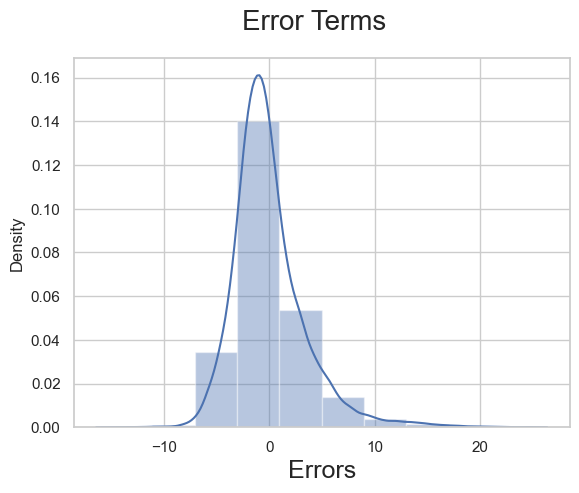

In [185]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# If you have model.predict(X_test)
y_pred = model2.predict(X_test_lm)
residual= y_test - y_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



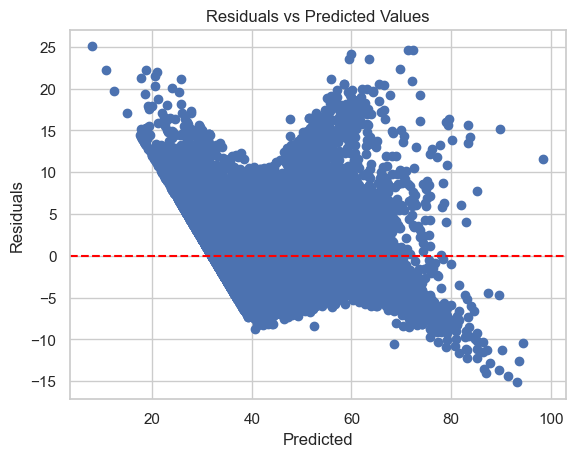

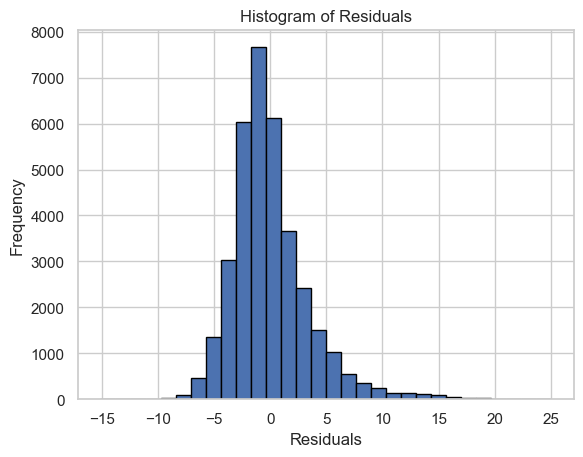

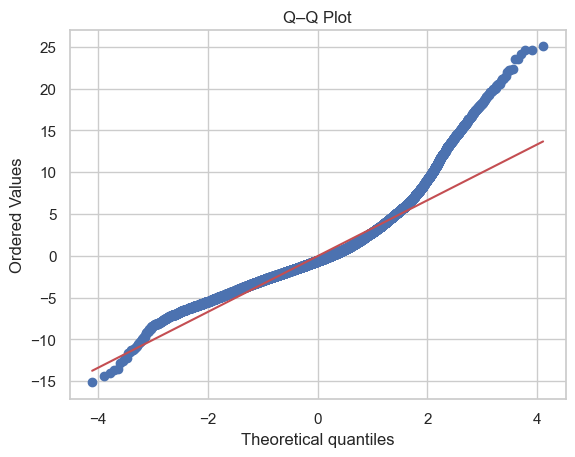

In [191]:
import numpy as np

# If you have model.predict(X_test)
y_test_pred = model2.predict(X_test_lm)
residuals = y_test - y_test_pred


# Residuals vs Predicted Plot
import matplotlib.pyplot as plt

plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of Residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

#Q–Q (Quantile–Quantile) Plot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q–Q Plot')
plt.show()





[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, the dataset originally had three categorical variables:

is_weekend

store_primary_category

order_protocol

However, I dropped order_protocol and store_primary_category during preprocessing because they did not show a strong or consistent impact on the dependent variable (total_time_minutes), and they added unnecessary complexity to the model.

After analysis, I found that is_weekend has a significant effect on delivery time. This was evident from the heatmap, where is_weekend showed a noticeable correlation with total_time_minutes. It suggests that delivery patterns differ on weekends, possibly due to changes in traffic, order volume, or workforce availability.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter test_size=0.2 in the train_test_split() function refers to:

"20% of the dataset will be used as the test set, and the remaining 80% will be used as the training set."



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Five variable which have the highest impact on the target variable.
    > 1. subtotal
    > 2. num_distinct_item
    > 3. total_outstanding_order
    > 4. disatance
    > 5. created_hour



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To handle outliers, I used the Interquartile Range (IQR) method. For each numerical column, I calculated the first (Q1) and third (Q3) quartiles and found the IQR as Q3 - Q1. I then defined acceptable data as values within Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. I wrote a function to return a boolean mask for each column, identifying rows that are not outliers. Starting with a mask of all True, I combined these masks across all numerical columns to filter out rows containing any outliers. Finally, I applied this combined mask to both X_train and y_train to clean the training data and improve the quality of my model input.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model (model2), the top 3 features significantly affecting delivery time are:

    1.total_outstanding_orders
A higher number of pending orders tends to increase delivery time, as it puts more load on the system and delays order assignment and fulfillment.

    2.total_onshift_dashers

More dashers on shift generally helps reduce delivery time, indicating that better workforce availability leads to faster deliveries.

    3.distance

As expected, longer distances between the store and customer significantly increase delivery time, making it a strong and intuitive predictor.

These features had the highest absolute standardized coefficients in the model, indicating their strong influence on the target variable (total_time_minutes).





---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship, meaning the change in the dependent variable is proportional to the change in the predictors. The algorithm fits a line (or hyperplane in multiple dimensions) by minimizing the sum of squared differences between the actual and predicted values—known as the least squares method. The result is a linear equation:
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ,
where the β values are coefficients learned from the training data.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**


Simple linear regression involves **one independent variable** to predict a **single dependent variable**. It models their relationship using a straight line with the equation:
`y = β₀ + β₁x + ε`,
where `β₀` is the intercept, `β₁` is the slope, and `ε` is the error term.

Multiple linear regression, on the other hand, involves **two or more independent variables** to predict the dependent variable. Its equation is:
`y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε`.

The key difference lies in the **number of predictors** used—multiple regression captures more complex relationships between the variables and the outcome.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how well the model's predictions match the actual data. The most commonly used cost function is the Mean Squared Error (MSE), which calculates the average of the squared differences between predicted and actual values.
>
> It is given by:
MSE = (1/n) * Σ(yᵢ - ŷᵢ)²
where yᵢ is the actual value and ŷᵢ is the predicted value.
>
>The goal is to minimize the cost function to improve model accuracy. This is typically done using analytical methods (like the normal equation) or iterative optimization (like gradient descent).




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns the training data too well, including its noise and outliers. As a result, it performs very well on training data but poorly on unseen test data, showing low bias but high variance.
>
>Underfitting, on the other hand, happens when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test data, showing high bias and low variance.
>
>In short, overfitting = too complex, underfitting = too simple. The goal is to build a model that generalizes well, balancing bias and variance.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help diagnose how well a linear regression model fits the data by showing the difference between actual and predicted values (residuals) against the predicted values. Ideally, residuals should be randomly scattered around zero, indicating that the model has captured the underlying pattern correctly.
>
>**Key insights from residual plots:**
>
>* Patterns or curves suggest model misspecification or non-linearity.
>
>*  Fan-shaped spread indicates heteroscedasticity (non-constant variance), violating regression assumptions.
>
> * Outliers or extreme residuals may distort the model’s performance.
>
> *  A random spread confirms linearity, constant variance, and good model fit.
>
>   Thus, residual plots are essential for validating model assumptions and improving model accuracy.